In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score



In [176]:
import pandas as pd
import os

# Especifica la ruta de la carpeta local donde clonaste el repositorio de GitHub
carpeta_github = 'C:/Users/anamo/OneDrive/Documentos/MASTER-UNIR/TFM/dataset'

# Obtén la lista de archivos Excel en la carpeta
archivos_excel = [archivo for archivo in os.listdir(carpeta_github) if archivo.endswith('.csv')]

# Crea una lista vacía para almacenar los DataFrames de los archivos Excel
dataframes = []

# Itera sobre cada archivo Excel y lee los datos en un DataFrame
for archivo in archivos_excel:
    ruta_archivo = os.path.join(carpeta_github, archivo)
    df = pd.read_csv(ruta_archivo)
    dataframes.append(df)

# Combina todos los DataFrames en uno solo
df_completo = pd.concat(dataframes, ignore_index=True)

# Ahora tienes todos los datos de los archivos Excel en el DataFrame df_completo
data1=df_completo

In [177]:
#visualizar los datos
data1.head()


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,27/08/11,Granada,Betis,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SP1,27/08/11,Sp Gijon,Sociedad,1,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP1,27/08/11,Valencia,Santander,4,3,H,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SP1,28/08/11,Ath Bilbao,Vallecano,1,1,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP1,28/08/11,Ath Madrid,Osasuna,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
data1.count()
data1.isna()
print(data1.dtypes)

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 138, dtype: object


In [179]:
#nombre de las variables, conteo de missings y tipo de variable
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Columns: 138 entries, Div to AvgCAHA
dtypes: float64(115), int64(16), object(7)
memory usage: 4.8+ MB


In [180]:
#estadisticas de los datos
data1.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,4530.000000,4530.000000,4530.000000,4530.000000,4530.00000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,...,1490.000000,1490.000000,1489.000000,1489.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,1.541280,1.127152,0.682561,0.491832,13.44106,10.649669,4.769536,3.723400,13.852318,13.699117,...,1.843564,-0.294128,1.947005,1.962136,1.958342,1.969899,2.014732,2.025711,1.932611,1.942376
std,1.342182,1.130555,0.852765,0.713278,4.96205,4.421565,2.594532,2.192362,4.254080,4.238811,...,0.405992,0.741319,0.107649,0.104147,0.107591,0.107889,0.107197,0.112344,0.097954,0.098060
min,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.260000,-2.750000,1.600000,1.550000,1.650000,1.610000,1.780000,1.650000,1.680000,1.570000
25%,1.000000,0.000000,0.000000,0.000000,10.00000,8.000000,3.000000,2.000000,11.000000,11.000000,...,1.580000,-0.750000,1.870000,1.880000,1.870000,1.880000,1.930000,1.940000,1.850000,1.860000
50%,1.000000,1.000000,0.000000,0.000000,13.00000,10.000000,4.000000,3.000000,14.000000,13.000000,...,1.730000,-0.250000,1.950000,1.970000,1.950000,1.970000,2.010000,2.020000,1.930000,1.940000
75%,2.000000,2.000000,1.000000,1.000000,16.00000,13.000000,6.000000,5.000000,17.000000,16.000000,...,1.980000,0.250000,2.040000,2.050000,2.040000,2.050000,2.100000,2.110000,2.010000,2.020000
max,10.000000,8.000000,6.000000,5.000000,36.00000,39.000000,18.000000,16.000000,33.000000,30.000000,...,4.140000,2.250000,2.380000,2.300000,2.490000,2.390000,2.690000,2.470000,2.460000,2.240000


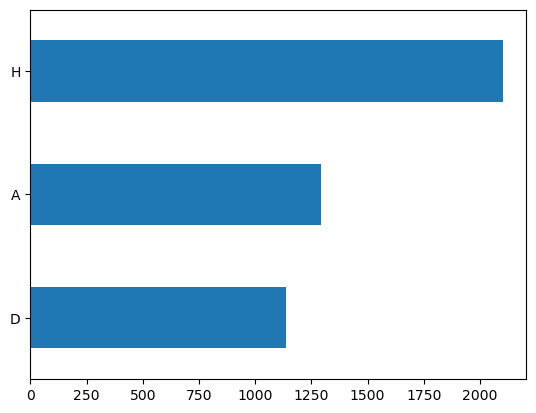

In [181]:
#conteo de casos de la variable explicativa (HTR)
def distribucion_variable_categorica(col):
    data1[col].value_counts(ascending=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('FTR')
#H=Home Win, D=Draw, A=Away Win

In [182]:
data1.groupby('FTR').count()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
FTR,,,,,,,,,,,,,,,,,,,,,
A,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,...,423,423,423,423,423,423,423,423,423,423
D,1135,1135,1135,1135,1135,1135,1135,1135,1135,1135,...,403,403,402,402,403,403,403,403,403,403
H,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,...,664,664,664,664,664,664,664,664,664,664


In [183]:
data2=data1.iloc[:,0:22]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       4530 non-null   object
 1   Date      4530 non-null   object
 2   HomeTeam  4530 non-null   object
 3   AwayTeam  4530 non-null   object
 4   FTHG      4530 non-null   int64 
 5   FTAG      4530 non-null   int64 
 6   FTR       4530 non-null   object
 7   HTHG      4530 non-null   int64 
 8   HTAG      4530 non-null   int64 
 9   HTR       4530 non-null   object
 10  HS        4530 non-null   int64 
 11  AS        4530 non-null   int64 
 12  HST       4530 non-null   int64 
 13  AST       4530 non-null   int64 
 14  HF        4530 non-null   int64 
 15  AF        4530 non-null   int64 
 16  HC        4530 non-null   int64 
 17  AC        4530 non-null   int64 
 18  HY        4530 non-null   int64 
 19  AY        4530 non-null   int64 
 20  HR        4530 non-null   int64 
 21  AR        4530

In [184]:
#nombre de todas las variables
variables=data2.columns.values
print(variables)

['Div' 'Date' 'HomeTeam' 'AwayTeam' 'FTHG' 'FTAG' 'FTR' 'HTHG' 'HTAG'
 'HTR' 'HS' 'AS' 'HST' 'AST' 'HF' 'AF' 'HC' 'AC' 'HY' 'AY' 'HR' 'AR']


In [185]:
variable_explicativa='FTR'
variables_numericas = data2.select_dtypes(include=['int64'])

In [186]:
for var in variables_numericas:
    groups = data1.groupby(variable_explicativa)[var].apply(list)
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"Variable: {var}")
    print(f"F-Statistic: {f_statistic:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print()

Variable: FTHG
F-Statistic: 1625.0756
P-Value: 0.0000

Variable: FTAG
F-Statistic: 1565.9411
P-Value: 0.0000

Variable: HTHG
F-Statistic: 584.5229
P-Value: 0.0000

Variable: HTAG
F-Statistic: 457.8598
P-Value: 0.0000

Variable: HS
F-Statistic: 45.9773
P-Value: 0.0000

Variable: AS
F-Statistic: 74.9786
P-Value: 0.0000

Variable: HST
F-Statistic: 405.0068
P-Value: 0.0000

Variable: AST
F-Statistic: 474.8315
P-Value: 0.0000

Variable: HF
F-Statistic: 2.9704
P-Value: 0.0514

Variable: AF
F-Statistic: 3.5437
P-Value: 0.0290

Variable: HC
F-Statistic: 4.3615
P-Value: 0.0128

Variable: AC
F-Statistic: 0.3952
P-Value: 0.6736

Variable: HY
F-Statistic: 31.6217
P-Value: 0.0000

Variable: AY
F-Statistic: 6.5897
P-Value: 0.0014

Variable: HR
F-Statistic: 49.2452
P-Value: 0.0000

Variable: AR
F-Statistic: 23.6971
P-Value: 0.0000



In [187]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       4530 non-null   object
 1   Date      4530 non-null   object
 2   HomeTeam  4530 non-null   object
 3   AwayTeam  4530 non-null   object
 4   FTHG      4530 non-null   int64 
 5   FTAG      4530 non-null   int64 
 6   FTR       4530 non-null   object
 7   HTHG      4530 non-null   int64 
 8   HTAG      4530 non-null   int64 
 9   HTR       4530 non-null   object
 10  HS        4530 non-null   int64 
 11  AS        4530 non-null   int64 
 12  HST       4530 non-null   int64 
 13  AST       4530 non-null   int64 
 14  HF        4530 non-null   int64 
 15  AF        4530 non-null   int64 
 16  HC        4530 non-null   int64 
 17  AC        4530 non-null   int64 
 18  HY        4530 non-null   int64 
 19  AY        4530 non-null   int64 
 20  HR        4530 non-null   int64 
 21  AR        4530

In [188]:
data2['ano'] = data2['Date'].apply(lambda x: x[6:8])
data2['dia'] = data2['Date'].apply(lambda x: x[0:2])
data2['mes'] = data2['Date'].apply(lambda x: x[3:5])

In [189]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       4530 non-null   object
 1   Date      4530 non-null   object
 2   HomeTeam  4530 non-null   object
 3   AwayTeam  4530 non-null   object
 4   FTHG      4530 non-null   int64 
 5   FTAG      4530 non-null   int64 
 6   FTR       4530 non-null   object
 7   HTHG      4530 non-null   int64 
 8   HTAG      4530 non-null   int64 
 9   HTR       4530 non-null   object
 10  HS        4530 non-null   int64 
 11  AS        4530 non-null   int64 
 12  HST       4530 non-null   int64 
 13  AST       4530 non-null   int64 
 14  HF        4530 non-null   int64 
 15  AF        4530 non-null   int64 
 16  HC        4530 non-null   int64 
 17  AC        4530 non-null   int64 
 18  HY        4530 non-null   int64 
 19  AY        4530 non-null   int64 
 20  HR        4530 non-null   int64 
 21  AR        4530

In [190]:
data2.corr()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
FTHG,1.000000,-0.059336,0.707667,-0.002300,0.286428,-0.069835,0.603880,-0.097231,-0.111715,-0.054576,0.010747,-0.037826,-0.158441,-0.025482,-0.076784,0.103504
FTAG,-0.059336,1.000000,-0.045840,0.684989,0.001297,0.281797,-0.045033,0.587173,-0.009041,-0.058777,0.007720,-0.002751,0.066372,-0.025355,0.141605,-0.054325
HTHG,0.707667,-0.045840,1.000000,-0.018058,0.118567,0.012428,0.393152,-0.042133,-0.016334,-0.063201,-0.077708,0.044652,-0.091102,-0.022192,-0.022227,0.064124
HTAG,-0.002300,0.684989,-0.018058,1.000000,0.082867,0.121156,0.020220,0.375623,-0.027503,-0.012169,0.079764,-0.066198,0.058569,-0.013142,0.081580,-0.010676
HS,0.286428,0.001297,0.118567,0.082867,1.000000,-0.243644,0.666460,-0.121848,-0.209220,-0.019933,0.500482,-0.250097,-0.132696,0.015754,-0.084075,0.128502
AS,-0.069835,0.281797,0.012428,0.121156,-0.243644,1.000000,-0.149082,0.656157,0.055766,-0.143898,-0.218610,0.470820,0.067867,-0.086100,0.134709,-0.113853
HST,0.603880,-0.045033,0.393152,0.020220,0.666460,-0.149082,1.000000,-0.108990,-0.160782,-0.037406,0.282144,-0.148201,-0.150954,-0.007848,-0.088553,0.109613
AST,-0.097231,0.587173,-0.042133,0.375623,-0.121848,0.656157,-0.108990,1.000000,0.027864,-0.104757,-0.111868,0.255357,0.077892,-0.063204,0.127148,-0.079367
HF,-0.111715,-0.009041,-0.016334,-0.027503,-0.209220,0.055766,-0.160782,0.027864,1.000000,0.029310,-0.157009,0.032827,0.392337,0.085590,0.062064,0.034161
AF,-0.054576,-0.058777,-0.063201,-0.012169,-0.019933,-0.143898,-0.037406,-0.104757,0.029310,1.000000,-0.001617,-0.099153,0.042298,0.352764,0.017313,0.059890


In [192]:
x=data2.drop(['Div','Date','FTR','HTR','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG'], axis=1)
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HS      4530 non-null   int64 
 1   AS      4530 non-null   int64 
 2   HST     4530 non-null   int64 
 3   AST     4530 non-null   int64 
 4   HF      4530 non-null   int64 
 5   AF      4530 non-null   int64 
 6   HC      4530 non-null   int64 
 7   AC      4530 non-null   int64 
 8   HY      4530 non-null   int64 
 9   AY      4530 non-null   int64 
 10  HR      4530 non-null   int64 
 11  AR      4530 non-null   int64 
 12  ano     4530 non-null   object
 13  dia     4530 non-null   object
 14  mes     4530 non-null   object
dtypes: int64(12), object(3)
memory usage: 531.0+ KB


In [193]:
y=data2['FTR']

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y) 
print(y)

[0 0 2 ... 2 2 1]


In [194]:
#se normalizan las variables
# Normalización de variables independientes
scaler = StandardScaler()
x_standar = scaler.fit_transform(x)
print(x_standar)

[[-0.49200011  1.66256575 -1.06756915 ... -1.86988691  1.26027931
   0.47990524]
 [ 0.71731106 -1.05170503 -0.29663208 ... -1.86988691  1.26027931
   0.47990524]
 [ 2.53127781 -1.50408349  2.40164768 ... -1.86988691  1.26027931
   0.47990524]
 ...
 [ 0.31420734  0.30543036  0.08883646 ...  1.02725109  0.5770226
  -0.31749202]
 [-0.29044824  0.53161959  0.47430499 ...  1.02725109  0.5770226
  -0.31749202]
 [-0.69355197 -1.27789426 -0.29663208 ...  1.02725109  0.5770226
  -0.31749202]]


In [199]:
#ahora vamos a hacer la division entre datos de entrenamiento y de validación

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_standar, y, test_size=0.25, random_state=50)

# Crear el modelo de regresión lineal
model = LogisticRegression()

# Entrenar el modelo utilizando los datos de entrenamiento normalizados
model.fit(X_train, y_train)


# Realizar predicciones utilizando los datos de prueba normalizados
y_test_pred = model.predict(X_test)
y_train_pred=model.predict(X_train)

accuracy = accuracy_score(y_test, y_test_pred)

accuracy2=accuracy_score(y_train, y_train_pred)

print(accuracy)
print(accuracy2)
#utilizar metodos de validacion cruzaada (subpoblaciones y no solo 80/20)

0.6160635481023831
0.6187812775978805


In [204]:
# Calcular la precisión
precision = precision_score(y_test, y_test_pred,average='micro')
print("Precisión:", precision)

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_test_pred, average='micro')
print("Sensibilidad (Recall):", recall)

# Calcular la F1 score (F! score)
f1_score = f1_score(y_test, y_test_pred, average='micro')
print("F1_score (Recall):", f1_score)


# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión:")
print(confusion)



# Calcular la curva de precisión-recall
#precision, recall, _ = precision_recall_curve(y_test, y_pred)
#plt.plot(recall, precision)
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Curva de Precisión-Recall')
#plt.show()

# Calcular la curva ROC
#fpr, tpr, _ = roc_curve(y_test, y_pred)
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Curva ROC')
#plt.show()


Precisión: 0.6160635481023831
Sensibilidad (Recall): 0.6160635481023831
Matriz de confusión:
[[208  38  65]
 [ 96  49 146]
 [ 50  40 441]]
F1_score (Recall): 0.6160635481023831


In [205]:
#random forest
model2 = RandomForestClassifier(criterion="gini", max_depth=None, max_features=None, 
                                class_weight=None, n_estimators = 200, random_state = 0)
model2.fit(X_train, y_train)
y_test_hat2 = model2.predict(X_test)


#accuracy:
accuracy_score(y_test, y_test_hat2)

0.5869373345101501

In [207]:
# Calcular la precisión
precision = precision_score(y_test, y_test_hat2,average='micro')
print("Precisión:", precision)

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_test_hat2, average='micro')
print("Sensibilidad (Recall):", recall)


# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_test_hat2)
print("Matriz de confusión:")
print(confusion)

# Calcular la curva de precisión-recall
#precision, recall, _ = precision_recall_curve(y_test, y_pred)
#plt.plot(recall, precision)
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Curva de Precisión-Recall')
#plt.show()

# Calcular la curva ROC
#fpr, tpr, _ = roc_curve(y_test, y_pred)
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Curva ROC')
#plt.show()

#100? de precision?????????

Precisión: 0.5869373345101501
Sensibilidad (Recall): 0.5869373345101501
Matriz de confusión:
[[185  62  64]
 [ 95  64 132]
 [ 57  58 416]]


In [212]:
y=data2['FTR']


label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x_standar, y_encoded, test_size=0.2, random_state=42)
model3= keras.Sequential(
    [layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
    ])

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#model3.summary()


history= model3.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))





Epoch 1/50
57/57 [==============================] - 3s 46ms/step - loss: 0.9795 - accuracy: 0.5240 - val_loss: 0.9047 - val_accuracy: 0.5762
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.6015 - val_loss: 0.8683 - val_accuracy: 0.5993
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.8402 - accuracy: 0.6140 - val_loss: 0.8599 - val_accuracy: 0.6148
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.8249 - accuracy: 0.6236 - val_loss: 0.8541 - val_accuracy: 0.6104
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.6239 - val_loss: 0.8536 - val_accuracy: 0.6082
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.8093 - accuracy: 0.6330 - val_loss: 0.8511 - val_accuracy: 0.6060
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.8055 - accuracy: 0.6338 - val_loss: 0.8530 - val_accuracy: 0.6115
Epoch 8/50
57/57 [=

In [216]:
# Verificamos el Accuracy y el loss
# ---------------------------------------------------
test_loss, test_acc = model3.evaluate(X_test, y_test)
print('Model Evaluate Loss:      ', test_loss)
print('Model Evaluate Accuracy:  ', test_acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.5905
Model Evaluate Loss:       0.880687952041626
Model Evaluate Accuracy:   0.5905077457427979


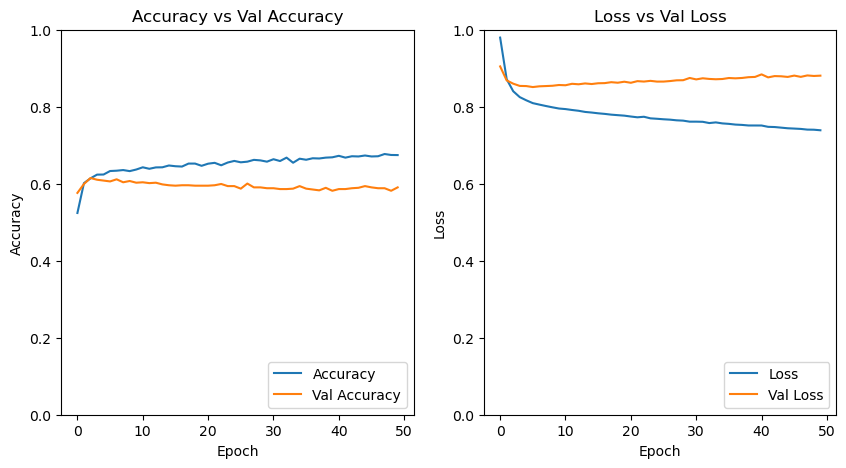

In [217]:
# 3. Visualizamos la diferencia entre ambas redes
# ---------------------------------------------------
plt.figure(figsize=(10,5))
# 1. Visualizamos Accuracy y val_Acurracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
#plt.xlim([0, 15])
plt.legend(['Accuracy', 'Val Accuracy'], loc='lower right')

# 1. Visualizamos loss y val_loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Val Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
#plt.xlim([0, 15])
plt.legend(['Loss', 'Val Loss'], loc='lower right')